## Пример на линейную регрессию

Данные - недвижимость Бостона https://www.kaggle.com/c/boston-dataset/data 

In [1]:
import pandas as pd

In [2]:
#Читаем данные в датафрейм
df=pd.read_csv("boston_data.csv")

In [3]:
#Симотрим первые 5 строк данных
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


## Описание переменных
- CRIM     per capita crime rate by town 
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town  
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) категориальная  переменная 
- NOX      nitric oxides concentration (parts per 10 million) 
- RM       average number of rooms per dwelling 
- AGE      proportion of owner-occupied units built prior to 1940 
- DIS      weighted distances to five Boston employment centres  
- RAD      index of accessibility to radial highways 
- TAX      full-value property-tax rate per 10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town  
- LSTAT    lower status of the population
- MEDV     Median value of owner-occupied homes in 1000's 


-    CRIM - количество преступлений на душу населения
-    ZN - процент жилых участков площадью больше 25 тыс. кв. футов (~ 23 сотки)
-    INDUS - процент площадей под оптовую торговлю
-    CHAS - протекает ли река
-    NOX - концентрация оксидов азота
-    RM - среднее число комнат в здании
-    AGE - доля зданий, построенных до 1940 года
-    DIS - взвешенное расстояние до 5 деловых центров Бостона
-    RAD - индекс доступности скоростных магистралей
-    TAX - уровень налогов
-    PTRATIO - среднее число учащихся на одного преподавателя
-    B - процент афроамериканцев
-    LSTAT - процент граждан с низким уровнем жизни
-    MEDV (целевой) - медианная стоимости домов в районе


Целевая переменная - это стоимость дома (medv)

In [4]:
#Информация о данных 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
crim       404 non-null float64
zn         404 non-null float64
indus      404 non-null float64
chas       404 non-null float64
nox        404 non-null float64
rm         404 non-null float64
age        404 non-null float64
dis        404 non-null float64
rad        404 non-null float64
tax        404 non-null float64
ptratio    404 non-null float64
black      404 non-null float64
lstat      404 non-null float64
medv       404 non-null float64
dtypes: float64(14)
memory usage: 44.3 KB


Пропущенных данных нет. Всего 404 позиции. 

In [5]:
#Общая статистика по данным
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [6]:
#Подключаем графическую библиотеку
import matplotlib.pyplot as plt
%matplotlib inline



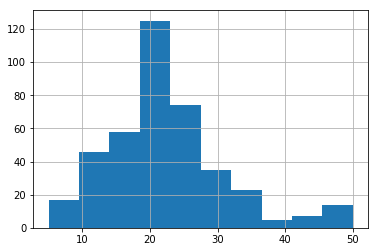

In [7]:
# Строим гистограмму цен
df["medv"].hist()

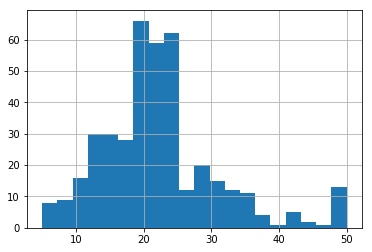

In [8]:
# Можно увеличить количество столбцов
df["medv"].hist(bins=20)

Видно, что есть выбросы около цены в 50.000 долларов. Их можно было бы выбросить

In [9]:
#Разобъем данные на целевую переменную y и сами данные X
X = df.drop('medv', axis = 1)
y=  df['medv']

In [10]:
#Импортируем еще одну графическую библиотеку
import seaborn as sns


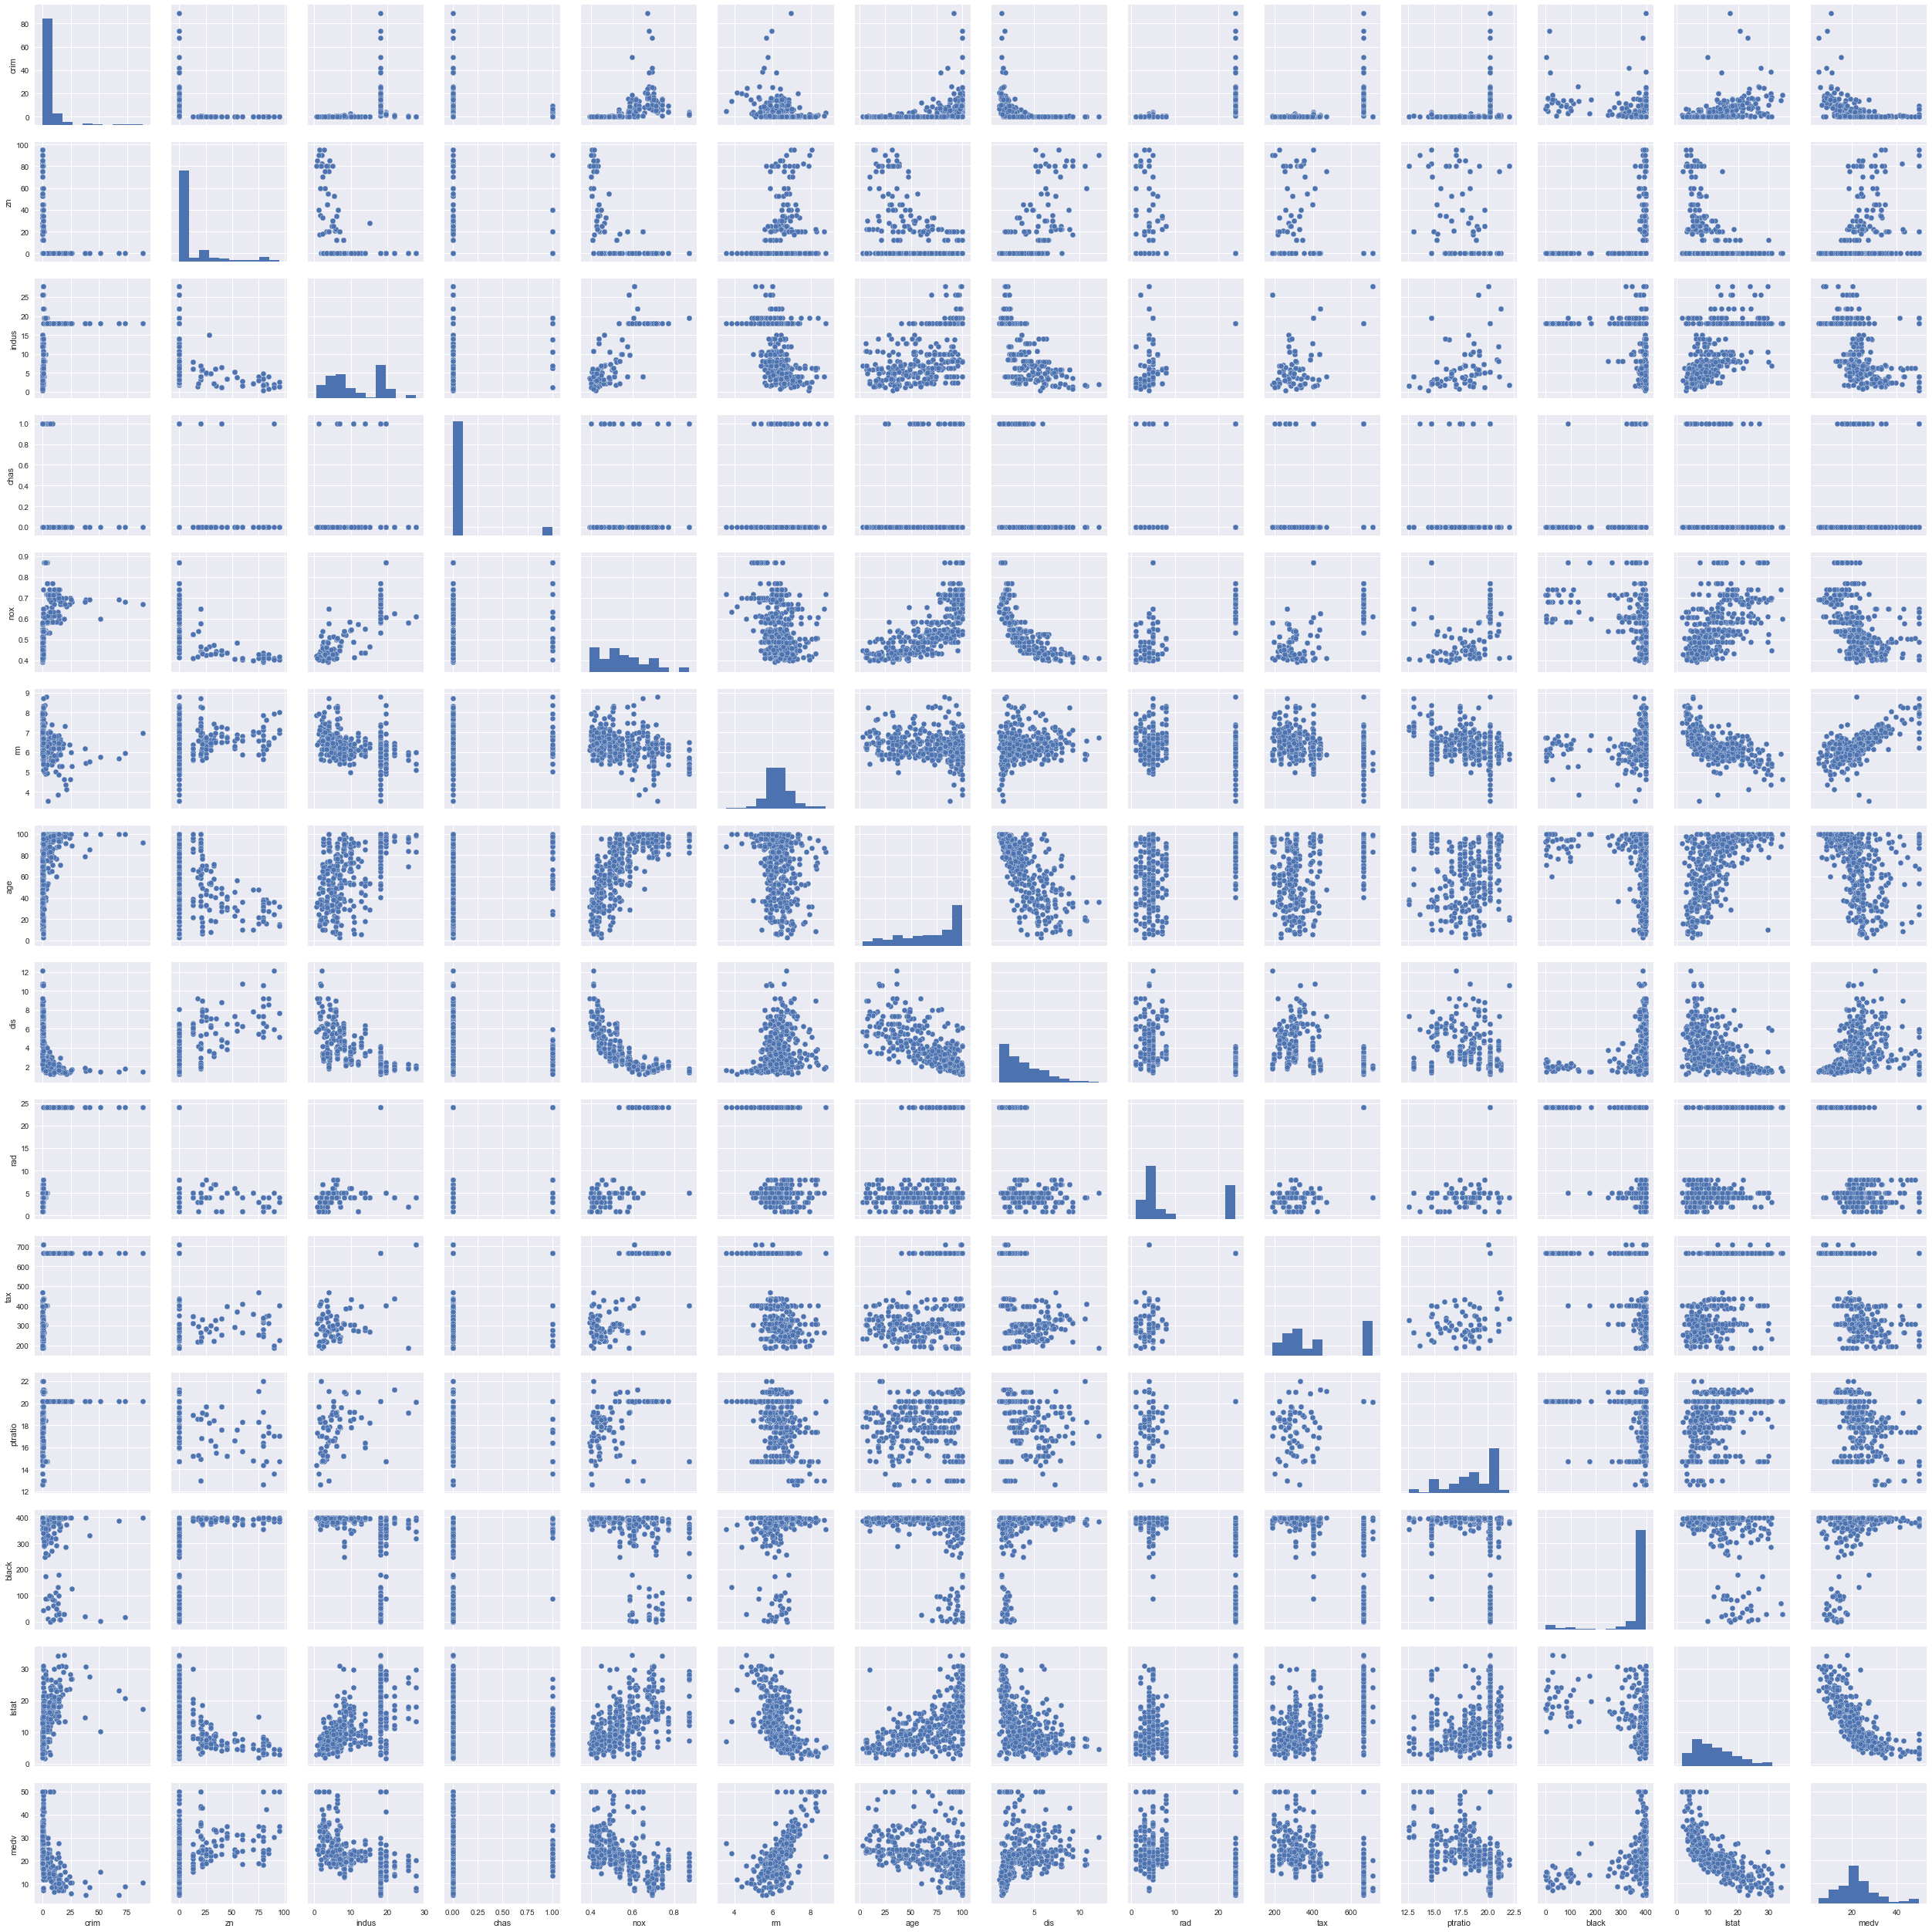

In [11]:
#Попарные графики
sns.pairplot(df, size=2.5)

In [12]:
#Выбросим часть столбцов 
data=df[['rm', 'lstat', 'ptratio', 'medv']]

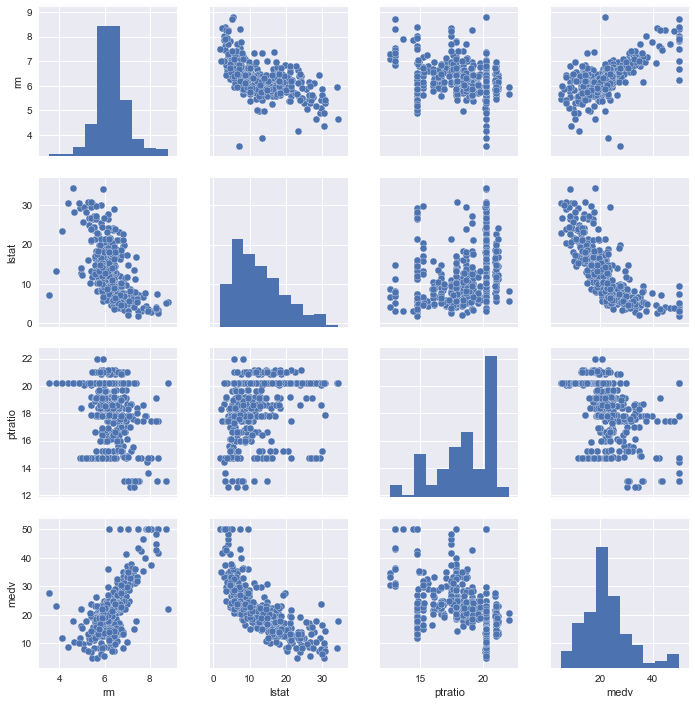

In [13]:
sns.pairplot(data, size=2.5)

Есть что-то похожее на линейную зависимость между ценой (medv) и количеством комнат (rm)

In [14]:
#Подключаем метрики
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [15]:
#Разделение данных на тестовую и тренировочную выборки
#Подключаем функцию разделения данных
from sklearn.model_selection import train_test_split

In [16]:
df_train, df_test = train_test_split(df, test_size = 0.3)

#Данные в X, здесь выбросили из датафрейма столбец "medv", axis = 1 указывает, что работа со столбцом
X_train=df_train.drop('medv', axis = 1)
X_test=df_test.drop('medv', axis = 1)

#Целевая переменная в y
y_train=df_train['medv']
y_test=df_test['medv']

In [17]:
#Подключаем метод Линейной регрессии для работы
from sklearn.linear_model import LinearRegression
# Объявили модель
model_regression = LinearRegression()

In [18]:
# Обучили модель на тренировочной выборке 
model_regression.fit(X_train, y_train)
# Сделали прогнозы на тестовой выборке 
y_test_predict = model_regression.predict(X_test)

In [19]:
import numpy as np


In [20]:
#метрики качества для регрессии
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
y_train_predict = model_regression.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
#Печать строки 'RMSE is {}', на месте {} будет подставляться rmse
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = model_regression.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.14321740074486
R2 score is 0.7758441143148225


The model performance for testing set
--------------------------------------
RMSE is 5.052480845810569
R2 score is 0.6843375950679862
